In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
# df.loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Median Year = 2007.0


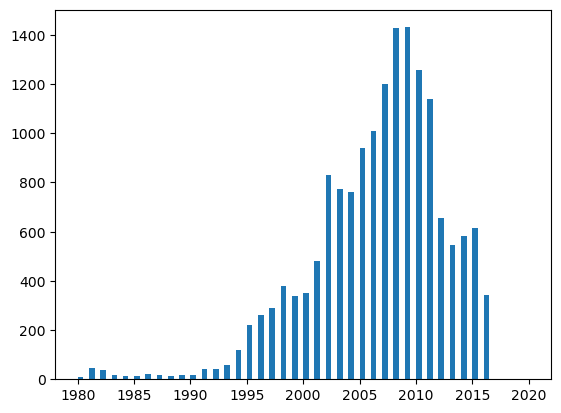

In [3]:
print(f"Median Year = {df['Year'].median()}")
y = df['Year']
plt.hist(y,bins=80)
plt.show()

In [6]:
# Number of NaN values in each column.
print(df.isna().sum())
# Insert some of the title years into the NaN values.
index_years = []
for x in df[df.Year.isna()].index.values:
    y = df.loc[x, 'Name']
    y = y.split(' ')
    for i in y:
        # If the year is in the title then put year and index into 'index_years' list.
        if i.isdigit() and len(i) == 4:
            val = {"index": x, "Year": i}
            index_years.append(val)
# List of index and years where there are nan values in column 'Year'.
nan_year_index = [j['index'] for j in index_years]
nan_year = [j['Year'] for j in index_years]
# Replace the years at the index
df.loc[nan_year_index, 'Year'] = nan_year

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [7]:
# Now some of the NaN values are filled in.
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            256
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
print(f"There are {len(df['Publisher'].unique())} Publishers")
df[df.Publisher.isna()][["Name", "Platform", "Year", "Genre", "Publisher"]]

There are 579 Publishers


,Name,Platform,Year,Genre,Publisher
470,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,NaN
1303,Triple Play 99,PS,NaN,Sports,NaN
1662,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN
2222,Bentley's Hackpack,GBA,2005.0,Misc,NaN
3159,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN
3166,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN
3766,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN
4145,Sonic the Hedgehog,PS3,NaN,Platform,NaN
4526,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN
4635,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN


# Transfer "music.csv" to a Dataframe

In [8]:
music_data = pd.read_csv("music.csv")
music_data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


OLS Regression for music.csv

In [9]:
import statsmodels.api as sm
X = music_data.drop(columns=['genre'])
y = music_data['genre']
X = sm.add_constant(X) # adding a constant
df = pd.DataFrame()
df['genre'] = y
df[['const', 'age', 'sex']] = X
music_data = df
music_data

,genre,const,age,sex
0,HipHop,1.0,20,1
1,HipHop,1.0,23,1
2,HipHop,1.0,25,1
3,Jazz,1.0,26,1
4,Jazz,1.0,29,1
5,Jazz,1.0,30,1
6,Classical,1.0,31,1
7,Classical,1.0,33,1
8,Classical,1.0,37,1
9,Dance,1.0,20,0


In [10]:
Z = pd.get_dummies(music_data, columns=['genre'], drop_first=False)
Z

,const,age,sex,genre_Acoustic,genre_Classical,genre_Dance,genre_HipHop,genre_Jazz
0,1.0,20,1,0,0,0,1,0
1,1.0,23,1,0,0,0,1,0
2,1.0,25,1,0,0,0,1,0
3,1.0,26,1,0,0,0,0,1
4,1.0,29,1,0,0,0,0,1
5,1.0,30,1,0,0,0,0,1
6,1.0,31,1,0,1,0,0,0
7,1.0,33,1,0,1,0,0,0
8,1.0,37,1,0,1,0,0,0
9,1.0,20,0,0,0,1,0,0


In [11]:
y = Z['genre_Acoustic']
X = music_data[['age', 'sex', 'const']]
lin_reg = sm.OLS(y,X)

In [12]:
model = lin_reg.fit()
model.summary()

c:\Users\Mike\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         genre_Acoustic   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.875
Date:                Sun, 01 Oct 2023   Prob (F-statistic):              0.188
Time:                        15:26:08   Log-Likelihood:                -5.7659
No. Observations:                  18   AIC:                             17.53
Df Residuals:                      15   BIC:                             20.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age        -4.337e-18      0.017  -2.51e-16      1.000      -0.037       0.037
sex           -0.3333      0.172     -1.933      0.072      -0.701       0.034
const          0.3333      0.494      0.675      0.510      -0.719       1.386
==============================================================================
Omnibus:                        4.418   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.000
Skew:                           1.000   Prob(JB):                        0.223
Kurtosis:                       3.000   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y = Z['genre_Acoustic']
X = music_data[['age', 'sex', 'const']]
logit = sm.Logit(y,X)

In [14]:
model = logit.fit()
model.summary()

ML Decision Tree Algorithm for music.csv

In [5]:
from sklearn.tree import DecisionTreeClassifier
music_data = pd.read_csv("music.csv")
X = music_data.drop(columns=['genre'])
y = music_data['genre']

In [19]:
model = DecisionTreeClassifier()
print(X.head())
print(X.values)
# Adding X.values removes the feature names error, ("age, gender") by converting it to a list.
model.fit(X.values, y)
predictions = model.predict( [[21, 1], [22, 0]] )
predictions

   age  gender
0   20       1
1   23       1
2   25       1
3   26       1
4   29       1
[[20  1]
 [23  1]
 [25  1]
 [26  1]
 [29  1]
 [30  1]
 [31  1]
 [33  1]
 [37  1]
 [20  0]
 [21  0]
 [25  0]
 [26  0]
 [27  0]
 [30  0]
 [31  0]
 [34  0]
 [35  0]]


array(['HipHop', 'Dance'], dtype=object)

Import More Libraries

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

Minor EDA

In [7]:
print(f"{pd.unique(music_data['genre'])}\n")  # Possible outcomes
print(music_data.isna().sum()) # no incomplete values
music_data.describe()

['HipHop' 'Jazz' 'Classical' 'Dance' 'Acoustic']

age       0
gender    0
genre     0
dtype: int64


,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [21]:
# X datasets for training and testing, y datasets for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8) # Allocate 80% of data for testing.
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
# The accuracy score after allocating is now as low as 0.2 percent.
# There is very little data now for training the model.
print(predictions)
score

['Jazz' 'Classical' 'Jazz' 'Jazz' 'Jazz' 'Classical' 'Jazz' 'Classical'
 'Classical' 'Jazz' 'Classical' 'Classical' 'Classical' 'Jazz' 'Jazz']


0.2

In [8]:
# X datasets for training and testing, y datasets for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Allocate 20% of data for testing.
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
# The accuracy score so far is from 0.5 to 1 percent.
score

1.0

In [20]:
model = DecisionTreeClassifier()
model.fit(X.values, y)
# After training model call joblib.dump and give the model variable and the name that the model itself as arguments.
joblib.dump(model, 'music-recommender.joblib')
# The output contains the array of the joblib file.

['music-recommender.joblib']

In [21]:
# Return the trained model.
model = joblib.load('music-recommender.joblib')
predictions = model.predict([[21, 1]])
predictions

array(['HipHop'], dtype=object)

## Visulization of Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
music_data = pd.read_csv("music.csv")
X = music_data.drop(columns=['genre'])
y = music_data['genre']

